In [1]:
import csv

import pandas

from statistics import mean
import datetime 
from datetime import datetime

import math

import matplotlib.pyplot as plt
import numpy as np



In [2]:
ticket=pandas.read_csv("/Users/emma/Downloads/ticket_data.csv",sep = ',')

In [3]:
ticket

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00,2017-10-27 16:00:00+00,2590,2017-10-19 10:35:42.943+00,"{408,408}",{8371},628,562
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00,2017-10-27 13:30:00+00,2700,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00,2017-10-27 15:15:00+00,3000,2017-10-19 10:35:42.943+00,"{1105,1105}",{9},628,562
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00,2017-10-27 21:10:00+00,2880,2017-10-19 10:35:42.943+00,"{863,863}",{13},628,562


In [4]:
prices=ticket["price_in_cents"]
prices=prices/100 #prix en euro
print("le prix minimum est de", min(prices), "€")
print("le prix moyen est de", round(mean(prices),2), "€")
print("le prix maximum est de", max(prices), "€")

prices.describe()


le prix minimum est de 3.0 €
le prix moyen est de 43.83 €
le prix maximum est de 385.5 €


count    74168.000000
mean        43.827111
std         37.393254
min          3.000000
25%         19.000000
50%         33.500000
75%         52.500000
max        385.500000
Name: price_in_cents, dtype: float64

In [5]:
#réalisation du fonction  pour convertir une durée sous la forme %d days, %H:%M:%S en secondes

import datetime as dt

def convert_sec(str):
    if 'day' in str:   #si présence de jour ou non
        if 'days' in str:
            date_time = dt.datetime.strptime(str, "%d days, %H:%M:%S")
            a_timedelta = date_time - dt.datetime(1900, 1, 1)
            deltaDay = dt.timedelta(days=date_time.day)
            seconds = a_timedelta.total_seconds()+deltaDay.total_seconds()
        else :         
            date_time = dt.datetime.strptime(str, "%d day, %H:%M:%S")
            a_timedelta = date_time - dt.datetime(1900, 1, 1)
            deltaDay = dt.timedelta(days=date_time.day)
            seconds = a_timedelta.total_seconds()+deltaDay.total_seconds()
    else:
        date_time = dt.datetime.strptime(str, "%H:%M:%S")
        a_timedelta = date_time - dt.datetime(1900, 1, 1)
        seconds = a_timedelta.total_seconds()
    return(seconds)

In [6]:
#calcul des durées à partir des temps de départ et d'arrivée

from datetime import timedelta
dep=ticket["departure_ts"]
arr=ticket["arrival_ts"]
duree=[]
duree_second=[]
d=timedelta(seconds=0)
for i in range(len(dep)): 
    depdat = datetime.strptime(dep[i], "%Y-%m-%d %H:%M:%S+%f")
    arrdat=datetime.strptime(arr[i], "%Y-%m-%d %H:%M:%S+%f")
    d=d+(arrdat-depdat)
    dstr=str(arrdat-depdat)
    duree.append(dstr)
    duree_second.append(convert_sec(dstr))
    
    
moy=d.total_seconds()//len(dep)
moy=timedelta(seconds=moy)


ticket.insert(4, "duree", duree) #mise à jour du dataframe 
ticket.insert(5,"duree_seconds",duree_second) 


In [7]:
print("le temps de trajet minimum est de", min(duree))
print("le temps de trajet maximum est de", max(duree))
print("le temps de trajet moyen est de", moy)

le temps de trajet minimum est de 0:20:00
le temps de trajet maximum est de 9:59:00
le temps de trajet moyen est de 7:04:37


In [8]:
villes=pandas.read_csv("/Users/emma/Downloads/cities.csv",sep = ',')

In [9]:
#réalisation d'un data frame rassemblant les tickets et les distances de chaque trajet
LLOcity=pandas.merge(ticket,villes, left_on = ['o_city'], right_on = ['id'])
LLOcity.drop(['local_name', 'population','o_station','d_station','middle_stations'], axis = 1, inplace = True)
LLcity=pandas.merge(LLOcity, villes, left_on = ['d_city'], right_on = ['id'])
LLcity.drop(['local_name', 'population'], axis = 1, inplace = True)
LLcity.rename(columns= {'id_x':'id','id_y':"id_o_x",'id':'id_d_y'})



,id,company,duree,duree_seconds,departure_ts,arrival_ts,price_in_cents,search_ts,other_companies,o_city,d_city,id_o_x,unique_name_x,latitude_x,longitude_x,id_d_y,unique_name_y,latitude_y,longitude_y
0,6795025,8385,6:10:00,22200.0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,611,542,611,orleans,47.907018,1.906270,542,montpellier,43.604452,3.918318
1,6795026,9,17:50:00,64200.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,{13},611,542,611,orleans,47.907018,1.906270,542,montpellier,43.604452,3.918318
2,6795027,8377,"1 day, 7:57:00",115020.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{8377,8376}",611,542,611,orleans,47.907018,1.906270,542,montpellier,43.604452,3.918318
3,6795028,8377,21:35:00,77700.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{8377,8376}",611,542,611,orleans,47.907018,1.906270,542,montpellier,43.604452,3.918318
4,6795029,8381,21:46:00,78360.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,{8380},611,542,611,orleans,47.907018,1.906270,542,montpellier,43.604452,3.918318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6841687,8385,1:50:00,6600.0,2017-10-13 20:40:00+00,2017-10-13 22:30:00+00,1050,2017-10-12 18:56:29.547+00,NaN,528,295,528,milano,45.465422,9.185924,295,genova,44.415990,8.919045
74164,6841688,8385,1:40:00,6000.0,2017-10-13 20:50:00+00,2017-10-13 22:30:00+00,1300,2017-10-12 18:56:29.547+00,NaN,528,295,528,milano,45.465422,9.185924,295,genova,44.415990,8.919045
74165,6841689,13,19:55:00,71700.0,2017-10-13 19:10:00+00,2017-10-14 15:05:00+00,1580,2017-10-12 18:56:29.667+00,{13},528,295,528,milano,45.465422,9.185924,295,genova,44.415990,8.919045
74166,6841690,13,4:40:00,16800.0,2017-10-13 19:10:00+00,2017-10-13 23:50:00+00,1780,2017-10-12 18:56:29.667+00,{13},528,295,528,milano,45.465422,9.185924,295,genova,44.415990,8.919045


In [10]:
#calcul des distances pour chaque trajet à partir de la position de chaque ville

latX=LLcity["latitude_x"]
lonX=LLcity["longitude_x"]
latY=LLcity["latitude_y"]
lonY=LLcity["longitude_y"]


Rt=6371 #rayon de la terre en km
Distance=[] #donnée en km
for j in range(len(LLcity)):
    #calcul de la distance entre 2 points à partir de leurs latitude et longitude 
    Distance.append(Rt*math.acos((math.sin(latX[j]*math.pi/180)*math.sin(latY[j]*math.pi/180))+ (math.cos(latX[j]*math.pi/180)*math.cos(latY[j]*math.pi/180)*math.cos(lonY[j]*math.pi/180-lonX[j]*math.pi/180))))
    
distance=pandas.Series(Distance)

LLcity.insert(3,"distance",Distance)






In [11]:
LLcity


,id_x,company,duree,distance,duree_seconds,departure_ts,arrival_ts,price_in_cents,search_ts,other_companies,o_city,d_city,id_y,unique_name_x,latitude_x,longitude_x,id,unique_name_y,latitude_y,longitude_y
0,6795025,8385,6:10:00,503.197167,22200.0,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,611,542,611,orleans,47.907018,1.906270,542,montpellier,43.604452,3.918318
1,6795026,9,17:50:00,503.197167,64200.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,{13},611,542,611,orleans,47.907018,1.906270,542,montpellier,43.604452,3.918318
2,6795027,8377,"1 day, 7:57:00",503.197167,115020.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{8377,8376}",611,542,611,orleans,47.907018,1.906270,542,montpellier,43.604452,3.918318
3,6795028,8377,21:35:00,503.197167,77700.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{8377,8376}",611,542,611,orleans,47.907018,1.906270,542,montpellier,43.604452,3.918318
4,6795029,8381,21:46:00,503.197167,78360.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,{8380},611,542,611,orleans,47.907018,1.906270,542,montpellier,43.604452,3.918318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6841687,8385,1:50:00,118.566817,6600.0,2017-10-13 20:40:00+00,2017-10-13 22:30:00+00,1050,2017-10-12 18:56:29.547+00,NaN,528,295,528,milano,45.465422,9.185924,295,genova,44.415990,8.919045
74164,6841688,8385,1:40:00,118.566817,6000.0,2017-10-13 20:50:00+00,2017-10-13 22:30:00+00,1300,2017-10-12 18:56:29.547+00,NaN,528,295,528,milano,45.465422,9.185924,295,genova,44.415990,8.919045
74165,6841689,13,19:55:00,118.566817,71700.0,2017-10-13 19:10:00+00,2017-10-14 15:05:00+00,1580,2017-10-12 18:56:29.667+00,{13},528,295,528,milano,45.465422,9.185924,295,genova,44.415990,8.919045
74166,6841690,13,4:40:00,118.566817,16800.0,2017-10-13 19:10:00+00,2017-10-13 23:50:00+00,1780,2017-10-12 18:56:29.667+00,{13},528,295,528,milano,45.465422,9.185924,295,genova,44.415990,8.919045


In [12]:
#réalisation d'un data frame rassemblant les tickets, les distances et les types de transports des compagnies de chaque trajet
provider=pandas.read_csv("/Users/emma/Downloads/providers.csv",sep = ',')
LLcity=pandas.merge(provider, LLcity, left_on = ['id'], right_on = ['company'])
LLcity.drop(['company_id','provider_id','name','has_wifi','has_plug','has_adjustable_seats'], axis = 1, inplace = True)        


In [13]:
LLcity

,id_x,fullname,has_bicycle,transport_type,id_x,company,duree,distance,duree_seconds,departure_ts,...,o_city,d_city,id_y,unique_name_x,latitude_x,longitude_x,id_y,unique_name_y,latitude_y,longitude_y
0,9,Ouibus,False,bus,6795026,9,17:50:00,503.197167,64200.0,2017-10-13 13:05:00+00,...,611,542,611,orleans,47.907018,1.906270,542,montpellier,43.604452,3.918318
1,9,Ouibus,False,bus,6797849,9,19:45:00,595.301747,71100.0,2017-10-06 11:10:00+00,...,628,542,628,paris,48.847702,2.352311,542,montpellier,43.604452,3.918318
2,9,Ouibus,False,bus,6797852,9,20:25:00,595.301747,73500.0,2017-10-06 23:40:00+00,...,628,542,628,paris,48.847702,2.352311,542,montpellier,43.604452,3.918318
3,9,Ouibus,False,bus,6799520,9,19:45:00,595.301747,71100.0,2017-10-06 11:10:00+00,...,628,542,628,paris,48.847702,2.352311,542,montpellier,43.604452,3.918318
4,9,Ouibus,False,bus,6799523,9,20:25:00,595.301747,73500.0,2017-10-06 23:40:00+00,...,628,542,628,paris,48.847702,2.352311,542,montpellier,43.604452,3.918318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,8387,Vatry,NaN,bus,6844369,8387,"1 day, 2:45:00",281.084355,96300.0,2017-10-14 16:00:00+00,...,628,524,628,paris,48.847702,2.352311,524,metz,49.110633,6.183319
74164,8387,Vatry,NaN,bus,6844504,8387,"1 day, 3:15:00",281.084355,98100.0,2017-10-14 15:30:00+00,...,628,524,628,paris,48.847702,2.352311,524,metz,49.110633,6.183319
74165,8387,Vatry,NaN,bus,6844505,8387,"1 day, 2:45:00",281.084355,96300.0,2017-10-14 16:00:00+00,...,628,524,628,paris,48.847702,2.352311,524,metz,49.110633,6.183319
74166,8387,Vatry,NaN,bus,6832380,8387,5:50:00,211.035630,21000.0,2017-10-14 15:20:00+00,...,272,694,272,forbach,49.188141,6.899090,694,reims,49.214754,3.994568


In [14]:
#décomposition en 4 data frames, séparant les tickets en fonctions des distances des trajets 
D02=LLcity[LLcity["distance"]<200]
D28=LLcity[(LLcity["distance"]>200) &(LLcity["distance"]<800)]
D820=LLcity[(LLcity["distance"]>800) &(LLcity["distance"]<2000)]
D20=LLcity[LLcity["distance"]>2000]


In [15]:
D20[D20["transport_type"]=="carpooling"] 

,id_x,fullname,has_bicycle,transport_type,id_x,company,duree,distance,duree_seconds,departure_ts,...,o_city,d_city,id_y,unique_name_x,latitude_x,longitude_x,id_y,unique_name_y,latitude_y,longitude_y


In [16]:
#extraction du prix et de la durée moyenne pour les 12 posibilités de voyages 

DD=[D02,D28,D820,D20]
moyT=['train','bus','carpooling']
P=[]
Ds=[] #durée en seconde
D=[] #durée sous format optimisé
    
from datetime import timedelta

for k in DD:
    Pcol = []
    Dcol=[]
    Dcols = []
    for l in moyT:
        test_df = k[k["transport_type"]==l] 
        
        if test_df.shape[0] != 0:
            y=test_df['price_in_cents'].mean()/100
            y=round(y,2)
            Pcol.append(y)
            x=test_df['duree_seconds'].mean()
            x=round(x)
            Dcols.append(x)
            z=timedelta(seconds=x)
            Dcol.append(z)
        else: #si pas de données concernant ce cas 
            Pcol.append(0)
            Dcol.append(0)
            Dcols.append(0)
    P.append(Pcol)
    D.append(Dcol)
    Ds.append(Dcols)

In [17]:
#Résultats concernant l'évolution des prix 

In [18]:
Prix=pandas.DataFrame(P, index = ['Distance de moins de 200 km', 'Distance entre 200 et 800 km', 'Distance entre 800 et 2000 km','Distance de plus de 2000 km'], columns = ['Train', 'Bus', 'Covoiturage'])
print("l'évolution du prix des trajets en €")
Prix


l'évolution du prix des trajets en €


,Train,Bus,Covoiturage
Distance de moins de 200 km,34.88,21.83,11.77
Distance entre 200 et 800 km,91.25,34.95,32.18
Distance entre 800 et 2000 km,154.64,69.50,86.27
Distance de plus de 2000 km,0.00,0.00,0.00


Text(0, 0.5, 'Prix en €')

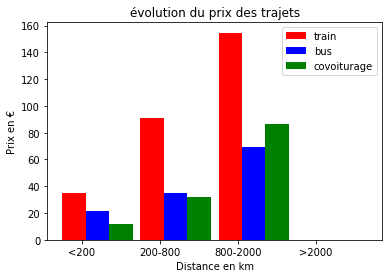

In [19]:
barWidth = 0.3
PT=np.array(P).T.tolist()
train = PT[0]
bus = PT[1]
covoit = PT[2]
r1 = range(len(train))
r2 = [x + barWidth for x in r1]
r3= [x + barWidth for x in r2]

plt.bar(r1, train, width = barWidth, color = ['red' for i in train],label='train')
plt.bar(r2, bus, width = barWidth, color = ['blue' for i in bus],label='bus')
plt.bar(r3, covoit, width = barWidth, color = ['green' for i in covoit],label='covoiturage')
plt.xticks([r + barWidth / 3 for r in range(len(train))], ['<200', '200-800', '800-2000', '>2000'])
plt.legend()
plt.title('évolution du prix des trajets')
plt.xlabel('Distance en km')
plt.ylabel('Prix en €')

In [20]:
#Résultats concernant l'évolution des temps de trajets

In [21]:
Durée=pandas.DataFrame(D, index = ['Distance de moins de 200 km', 'Distance entre 200 et 800 km', 'Distance entre 800 et 2000 km','Distance de plus de 2000 km'], columns = ['Train', 'Bus', 'Covoiturage'])
print("l'évolution de la durée des trajets")
Durée

l'évolution de la durée des trajets


,Train,Bus,Covoiturage
Distance de moins de 200 km,4:25:10,10:35:59,1:57:07
Distance entre 200 et 800 km,7:40:45,15:57:02,4:45:47
Distance entre 800 et 2000 km,12:09:31,"1 day, 6:32:39",13:06:01
Distance de plus de 2000 km,0,0,0


Text(0, 0.5, 'Durée en seconde')

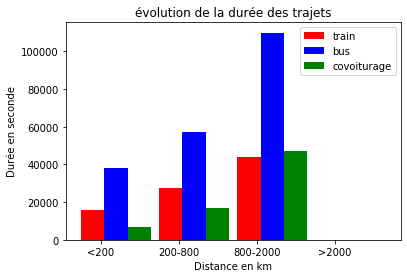

In [22]:
barWidth = 0.3
DT=np.array(Ds).T.tolist()
train = DT[0]
bus = DT[1]
covoit = DT[2]
r1 = range(len(train))
r2 = [x + barWidth for x in r1]
r3= [x + barWidth for x in r2]

plt.bar(r1, train, width = barWidth, color = ['red' for i in train],label='train')
plt.bar(r2, bus, width = barWidth, color = ['blue' for i in bus],label='bus')
plt.bar(r3, covoit, width = barWidth, color = ['green' for i in covoit],label='covoiturage')
plt.xticks([r + barWidth / 3 for r in range(len(train))], ['<200', '200-800', '800-2000', '>2000'])
plt.legend()
plt.title('évolution de la durée des trajets')
plt.xlabel('Distance en km')
plt.ylabel('Durée en seconde')